<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка и подготовка данных" data-toc-modified-id="Загрузка и подготовка данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span></li><li><span><a href="#Обучение и проверка модели" data-toc-modified-id="Обучение и проверка модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span></li><li><span><a href="#Подготовка к расчёту прибыли" data-toc-modified-id="Подготовка к расчёту прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span></li><li><span><a href="#Расчёт прибыли и рисков" data-toc-modified-id="Расчёт прибыли и рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span></li><li><span><a href="#Чек-лист готовности проекта" data-toc-modified-id="Чек-лист готовности проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
# загрузим необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
# загрузим файлы с данными
try:
    df_0 = pd.read_csv('/datasets/geo_data_0.csv')
    df_1 = pd.read_csv('/datasets/geo_data_1.csv')
    df_2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    df_0 = pd.read_csv('/Users/alex/Desktop/Яндекс_Практикум/Проекты/Машинное_обучение_в_бизнесе/geo_data_0.csv')
    df_1 = pd.read_csv('/Users/alex/Desktop/Яндекс_Практикум/Проекты/Машинное_обучение_в_бизнесе/geo_data_1.csv')
    df_2 = pd.read_csv('/Users/alex/Desktop/Яндекс_Практикум/Проекты/Машинное_обучение_в_бизнесе/geo_data_2.csv')

df_0.info()
df_1.info()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null 

In [3]:
# посмотрим на данные в таблицах
display(df_0.sample(3))
display(df_1.sample(3))
df_2.sample(3)

,id,f0,f1,f2,product
21703,wX2Zc,-0.474842,0.877820,8.981514,130.079578
81576,B6FAJ,0.298712,0.873514,-4.032822,25.895491
60643,tiImz,-0.351641,1.080589,2.652810,131.998798


,id,f0,f1,f2,product
81597,qTJIk,17.001998,-11.270849,1.992721,53.906522
50412,j7Pil,-19.154112,-9.142837,4.995540,137.945408
90321,q2VS0,6.862052,1.609384,1.002625,26.953261


,id,f0,f1,f2,product
49193,5cSf5,-1.025961,-1.212339,8.393348,61.626003
15396,AtLtX,-0.935855,0.038698,2.686976,124.332459
41445,wliWI,-0.286998,-0.465662,5.540092,65.586186


***Описание данных***

* `id` — уникальный идентификатор скважины;
* `f0`, `f1`, `f2` — три признака точек (признаки значимы);
* `product` — объём запасов в скважине (тыс. баррелей).

In [4]:
# проверим дубликаты
print(f"Количество дубликатов: {df_0.duplicated().sum()}")
print(f"Количество дубликатов: {df_1.duplicated().sum()}")
print(f"Количество дубликатов: {df_2.duplicated().sum()}")

Количество дубликатов: 0
Количество дубликатов: 0
Количество дубликатов: 0


,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


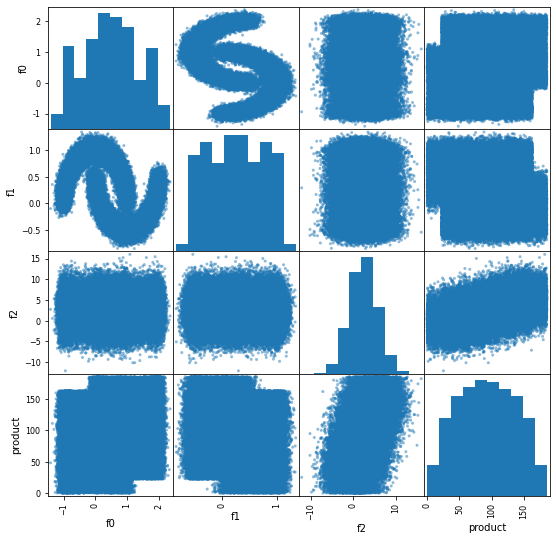

In [5]:
# диаграмма рассеяния и коэффициент корреляции для первого региона
pd.plotting.scatter_matrix(df_0, figsize=(9, 9))
display(df_0.corr())
df_0.describe()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


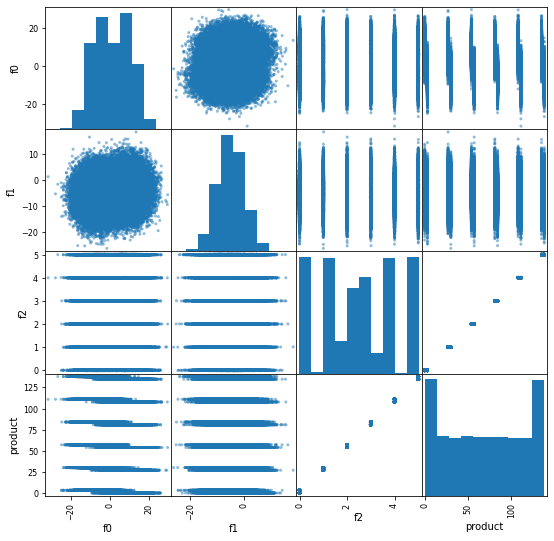

In [6]:
# диаграмма рассеяния и коэффициент корреляции для второго региона
pd.plotting.scatter_matrix(df_1, figsize=(9, 9))
display(df_1.corr())
df_1.describe()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


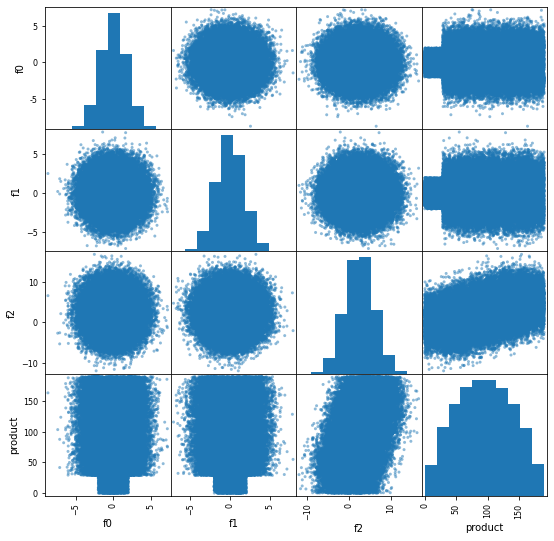

In [7]:
# диаграмма рассеяния и коэффициент корреляции для третьего региона
pd.plotting.scatter_matrix(df_2, figsize=(9, 9))
display(df_2.corr())
df_2.describe()

**Вывод**  

Данные загружены и проверены:
* пропущенных значений нет;
* обнаружена корреляция между признаками `product` и `f2` во всех наборах данных, во втором регионе (`df_1`) корреляция максимальная, почти достигает единицы. В первом регионе (`df0`) есть небольшая корреляция у признака `product` с первым (`f0`) и вторым признаками (`f1`). В других регионах эта корреляция близка к нулю;
* наблюдается нелинейная зависимость между признаками `f0` и `f1` в первом и втором регионах; 
* наибольший средний объем запасов нефти в скважине зафиксирован в 3-м регионе (`95`), наименьший — во втором (`92.5`).

## Обучение и проверка модели

Обучим и проверим модель для каждого региона:
* разобъём данные на обучающую и валидационную выборки в соотношении 75:25;
* обучим модель и сделаем предсказания на валидационной выборке;
* cохраним предсказания и правильные ответы на валидационной выборке;
* напечатаем на экране средний запас предсказанного сырья и RMSE модели;
* проанализируем результаты.

In [8]:
# напишем функцию, для разбиения данных, обучения модели и вывода среднего запаса предсказанного сырья и RMSE 
# сохраним предсказания и правильные ответы на валидационной выборке
def model_geo(geo_data):
    target = geo_data['product']
    features = geo_data.drop(['id', 'product'], axis = 1)
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=.25, random_state=42)
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    prediction_mean = predictions_valid.mean()
    rmse = mean_squared_error(target_valid, predictions_valid)**.5
    return (prediction_mean, rmse, target_valid.reset_index(drop=True), pd.Series(predictions_valid))

prediction_mean_0, rmse_0, target_valid_0, predictions_valid_0 = model_geo(df_0)
prediction_mean_1, rmse_1, target_valid_1, predictions_valid_1 = model_geo(df_1)
prediction_mean_2, rmse_2, target_valid_2, predictions_valid_2 = model_geo(df_2)


predictions_regions = pd.DataFrame({'Cредний запас предсказанного сырья, тыс. баррелей':
                                   [prediction_mean_0, prediction_mean_1, prediction_mean_2], 
                                   'RMSE': [rmse_0, rmse_1, rmse_2]},
                                  index=['geo_data_0', 'geo_data_1', 'geo_data_2'])
predictions_regions

,"Cредний запас предсказанного сырья, тыс. баррелей",RMSE
geo_data_0,92.398800,37.756600
geo_data_1,68.712878,0.890280
geo_data_2,94.771024,40.145872


**Вывод**  

* в первом регионе (`geo_data_0`) средний запас предсказанного сырья составляет `92.4` тыс. баррелей, и высокое значение `RMSE` `37.8`;
* во втором регионе (`geo_data_1`) средний запас предсказанного сырья составляет `68.7` тыс. баррелей, и низкое значение `RMSE` `0.9`;
* в третьем регионе (`geo_data_2`) средний запас предсказанного сырья составляет `94.8` тыс. баррелей, и высокое значение `RMSE` `40.2`.  

Это может говорить о невысоком качестве предсказаний модели в первом и третьем случаях и хороших предсказаниях во втором случае.


## Подготовка к расчёту прибыли

* все ключевые значения для расчётов сохраним в отдельных переменных;
* рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Сравним полученный объём сырья со средним запасом в каждом регионе.

In [9]:
# ключевые переменные, необходимые для дальнейших расчётов

# бюджет на разработку скважин в регионе в рублях
BUDGET = 10**10

# количество исследуемых точек в каждом регионе
POINTS_ALL_REGION = 500

# исследованные лучшие точки для разработки
POINTS_BEST = 200

# доход с каждой тысячи баррелей в рублях
REVENUE_BARREL = 450000

# максимальная доля убытков
MAX_LOSSES = 0.025

# бюджет на одну скважину
BUDGET_WELL = BUDGET / POINTS_BEST

# достаточный объём сырья для безубыточной разработки новой скважины
MIN_WELL_VOLUME = BUDGET_WELL / REVENUE_BARREL
print('Достаточный объём сырья для безубыточной разработки новой скважины:', MIN_WELL_VOLUME)

Достаточный объём сырья для безубыточной разработки новой скважины: 111.11111111111111


In [10]:
# посчитаем средний запас сырья в регионах
average_well_volume = pd.DataFrame({'Средний запас сырья в регионах, тыс. баррелей':
                                   [df_0['product'].mean(), df_1['product'].mean(), df_2['product'].mean()]},
                                   index=['geo_data_0', 'geo_data_1', 'geo_data_2'])
average_well_volume

,"Средний запас сырья в регионах, тыс. баррелей"
geo_data_0,92.500
geo_data_1,68.825
geo_data_2,95.000


Средний запас сырья в регионах явно меньше достаточного объёма для безубыточной разработки новой скважины.

## Расчёт прибыли и рисков 

* напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
** выберем скважины с максимальными значениями предсказаний,
** просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям,
** рассчитаем прибыль для полученного объёма сырья;
* посчитаем риски и прибыль для каждого региона:
** техника `Bootstrap` с `1000` выборок, чтобы найти распределение прибыли,
** найдём среднюю прибыль, `95%`-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.

In [11]:
# функция для расчёта прибыли по выбранным скважинам и предсказаниям модели
def calculate_profit(answer, prediction, count):
    func = answer[prediction.sort_values(ascending=False).index][:count]
    return ((REVENUE_BARREL * func.sum()) - BUDGET)

region_0_profit = calculate_profit(target_valid_0, predictions_valid_0, POINTS_BEST)
region_1_profit = calculate_profit(target_valid_1, predictions_valid_1, POINTS_BEST)
region_2_profit = calculate_profit(target_valid_2, predictions_valid_2, POINTS_BEST)

profit_predicted = pd.DataFrame({'Прибыль для полученного объёма сырья, млн руб':
                                   [region_0_profit/10**6, region_1_profit/10**6, region_2_profit/10**6]},
                                  index=['geo_data_0', 'geo_data_1', 'geo_data_2'])
profit_predicted

,"Прибыль для полученного объёма сырья, млн руб"
geo_data_0,3359.141114
geo_data_1,2415.086697
geo_data_2,2598.571759


Cамый перспективный для разработки регион: первый (`geo_data_0`) с прибылью в `3.4` млрд рублей.

In [13]:
# Bootstrap с 1000 повторений
state = np.random.RandomState(42)
def calculate_risk(answer, prediction):
    values = []
    lower = MAX_LOSSES
    upper = 0.95 - MAX_LOSSES
    for i in range(1000):
        target_subsample = answer.sample(POINTS_ALL_REGION, replace=True, random_state=state)
        probs_subsample = prediction[target_subsample.index]
        values.append(calculate_profit(answer, probs_subsample, POINTS_BEST))
      
    values = pd.Series(values)
    mean = values.mean()
    confidence_interval = (values.quantile(lower), values.quantile(upper))
    risk_loss = (values < 0).mean()
    return (mean, confidence_interval, risk_loss)

region_0_risk = calculate_risk(target_valid_0, predictions_valid_0)
region_1_risk = calculate_risk(target_valid_1, predictions_valid_1)
region_2_risk = calculate_risk(target_valid_2, predictions_valid_2)

risk_predicted = pd.DataFrame({'Средняя прибыль, млн руб':
                                   [region_0_risk[0]/10**6, region_1_risk[0]/10**6, region_2_risk[0]/10**6],
                              '95%-й доверительный интервал':
                                   [region_0_risk[1], region_1_risk[1], region_2_risk[1]],
                              'Риск убытков':
                                   [region_0_risk[2], region_1_risk[2], region_2_risk[2]]},
                                  index=['geo_data_0', 'geo_data_1', 'geo_data_2'])
risk_predicted

,"Средняя прибыль, млн руб",95%-й доверительный интервал,Риск убытков
geo_data_0,399.575478,"(-110467895.33197226, 756173879.1815902)",0.060
geo_data_1,452.576594,"(52309409.80273462, 745263755.9611629)",0.009
geo_data_2,378.705904,"(-127779434.98830414, 763774356.3674451)",0.075


In [14]:
# выведем общую таблицу по всем расчитанным ранее данным
totals = pd.concat([predictions_regions, average_well_volume, profit_predicted, risk_predicted], axis=1)
totals

,"Cредний запас предсказанного сырья, тыс. баррелей",RMSE,"Средний запас сырья в регионах, тыс. баррелей","Прибыль для полученного объёма сырья, млн руб","Средняя прибыль, млн руб",95%-й доверительный интервал,Риск убытков
geo_data_0,92.398800,37.756600,92.500,3359.141114,399.575478,"(-110467895.33197226, 756173879.1815902)",0.060
geo_data_1,68.712878,0.890280,68.825,2415.086697,452.576594,"(52309409.80273462, 745263755.9611629)",0.009
geo_data_2,94.771024,40.145872,95.000,2598.571759,378.705904,"(-127779434.98830414, 763774356.3674451)",0.075


**Вывод**  

Наилучший регион для разработки скважин: `geo_data_1`, с наименьшим риском убытков.